In [0]:
import pandas as pd

df = pd.read_csv("../../NewDataset.csv")

In [24]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Last Post Recent,%Post Single Day,Index of Activity,Average of Likes,Fake,Profile Pic Url,Username
0,1,0.000,2,42,1,0,0,111,688,409,1,3.000,11.111,68.300,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,matteo_cattani_
1,1,0.067,2,0,0,0,0,58,353,456,1,8.621,0.800,31.121,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,gabrielebegani5
2,1,0.000,0,0,0,0,0,44,535,364,1,4.545,1.417,49.750,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,mattelazzari
3,1,0.000,2,14,0,0,1,81,3109,298,1,1.235,0.833,160.556,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,davidobrasil
4,1,0.000,2,0,0,0,1,498,1071,1999,1,2.000,5.333,95.400,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,sofiazammarchi_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,0,0.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,sardashti2233
996,1,0.000,3,75,0,0,0,1,103,159,0,100.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,_mxnsterz_backup
997,1,0.000,1,0,0,0,0,0,88,322,0,0.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,rezysmods
998,0,0.000,1,0,0,0,0,0,929,1315,0,0.000,0.000,0.000,1,https://instagram.ffru6-1.fna.fbcdn.net/v/t51....,cravinforti_


In [25]:
# Set X array, containing all the values to valuate a Fake Account
X = df.iloc[:, 0:14].values
X[0]

array([  1.   ,   0.   ,   2.   ,  42.   ,   1.   ,   0.   ,   0.   ,
       111.   , 688.   , 409.   ,   1.   ,   3.   ,  11.111,  68.3  ])

In [26]:
# Assign y and print 
y = df.iloc[:, 14].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

"""
  Tree-based estimators can be used to compute feature importances, 
  which in turn can be used to discard irrelevant features
"""

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_ 

array([0.0371539 , 0.02525361, 0.02478037, 0.06385046, 0.03871627,
       0.01955657, 0.06529069, 0.01310494, 0.02798682, 0.09481861,
       0.37189349, 0.14781417, 0.04923092, 0.02054918])

In [28]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(1000, 3)

In [32]:
X_new[0]

array([409.,   1.,   3.])

Feature ranking:
1. feature 1 (0.519325) Last Post Recent
2. feature 2 (0.281687) % Post Single Day
3. feature 0 (0.198988) #Following


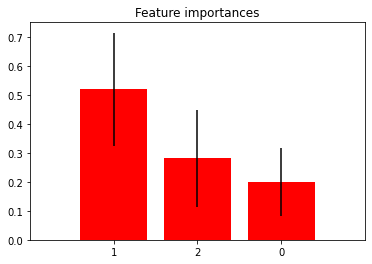

In [33]:
"""
 Feature Importance Forest of Trees
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_new, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

def printColumn(number):
  switcher = {
      0: "#Following",
      1: "Last Post Recent",
      2: "% Post Single Day"
  }
  return switcher.get(number, "Invalid Column")

for f in range(X_new.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_new.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_new.shape[1]), indices)
plt.xlim([-1, X_new.shape[1]])
plt.show()

In [34]:
"""
  Decision Tree Classifier
"""
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_new, y)

# Train and Test algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

print(clf.fit(X_train, y_train))

print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

670 670
330 330
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
TRAIN SET 1.0
TEST  SET 0.9363636363636364
